# Предобработка данных

скачаем таблицы соединими их по пересекающимся датам и создадим Stocks.csv

In [1]:
library(data.table)
install.packages('data.table')
install.packages("TSA")
library(TSA)

In [4]:
dataPath <- './'

In [5]:
sandp <- read.table(paste(dataPath,'sandp.csv',sep = '/'), header=TRUE, sep=';')

In [6]:
gold <- read.table(paste(dataPath,'gc.csv',sep = '/'), header=TRUE, sep=';')

In [7]:
brent <- read.table(paste(dataPath,'brn.csv',sep = '/'), header=TRUE, sep=';')

In [8]:
chfusd <- read.table(paste(dataPath,'chfusd.csv',sep = '/'), header=TRUE, sep=';')

In [9]:
eurusd <- read.table(paste(dataPath,'eurusd.csv',sep = '/'), header=TRUE, sep=';')

In [10]:
platina <- read.table(paste(dataPath,'pl.csv',sep = '/'), header=TRUE, sep=';')

In [11]:
 nokusd <- read.table(paste(dataPath,'nokusd.csv',sep = '/'), header=TRUE, sep=';')

In [12]:
gbpusd <- read.table(paste(dataPath,'gbpusd.csv',sep = '/'), header=TRUE, sep=';')

Зависимая переменная
Великобритания фунт/USD 
Предикторы
Индекс S&P500
Золото 
Нефть.Брент 
Швецария франк
Euro/USD
Платина 
Норвегия крона/USD

In [26]:
newtav <- data.table(merge(gbpusd, sandp,  by = 'X.DATE.', sort="FALSE"))

In [27]:
newtav <- data.table(merge(newtav, gold,  by = 'X.DATE.', sort="FALSE"))

In [28]:
newtav <- data.table(merge(newtav, brent,  by = 'X.DATE.', sort="FALSE"))

In [29]:
aZCXnewtav <- data.table(merge(newtav, chfusd,  by = 'X.DATE.', sort="FALSE"))

In [30]:
newtav <- data.table(merge(newtav, eurusd,  by = 'X.DATE.', sort="FALSE"))

In [31]:
newtav <- data.table(merge(newtav, platina,  by = 'X.DATE.', sort="FALSE"))

In [32]:
newtav <- data.table(merge(newtav, nokusd,  by = 'X.DATE.', sort="FALSE"))

In [33]:
colnames(newtav)<- c("X.DATE.", "GBPUSD", "SANDP500", "GOLD", "BRENT", "CHFUSD", "EURUSD", "PLATINA", "NOKUSD")

In [34]:
newtav$X.DATE.<-as.Date(newtav$X.DATE.,"%m/%d/%y")

In [76]:
head(newtav)

X.DATE.,GBPUSD,SANDP500,GOLD,BRENT,CHFUSD,EURUSD,PLATINA,NOKUSD
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-03-08,1.3822,3821.35,1685.1,68.12,1.06801,1.18503,1144.9,0.117063
2021-03-09,1.3887,3875.44,1711.1,67.30,1.07718,1.18969,1173.2,0.117997
2021-03-10,1.3929,3898.81,1730.0,68.18,1.07500,1.19242,1202.3,0.118450
2021-03-11,1.3987,3939.34,1716.8,69.62,1.08109,1.19808,1206.2,0.118800
2021-03-12,1.3922,3943.34,1725.8,69.23,1.07540,1.19516,1208.5,0.118530
2021-03-15,1.3897,3968.94,1732.0,68.79,1.07771,1.19254,1214.5,0.118106


In [77]:
tail(newtav)

X.DATE.,GBPUSD,SANDP500,GOLD,BRENT,CHFUSD,EURUSD,PLATINA,NOKUSD
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-03-01,1.2026,3951.39,1840.4,84.43,1.06400,1.06680,959.1,0.096280
2023-03-02,1.1948,3981.35,1844.0,84.35,1.06110,1.05978,966.6,0.095617
2023-03-03,1.2040,4045.64,1862.8,86.00,1.06790,1.06340,983.9,0.096260
2023-03-06,1.2024,4048.42,1852.5,86.25,1.07421,1.06849,979.5,0.095881
2023-03-07,1.1827,3986.37,1815.6,83.08,1.06100,1.05484,934.7,0.093441
2023-03-08,1.1849,3992.01,1817.8,82.52,1.06251,1.05490,941.5,0.093571


In [36]:
sum(is.na(newtav))

[1] 0

пустых данных нет - все отлично

In [37]:
write.csv(newtav,file='./Stocks.csv', col.names=TRUE)

Warning message in write.csv(newtav, file = "./Stocks.csv", col.names = TRUE):
“attempt to set 'col.names' ignored”


# Линейная регрессия

Скачаем файл Stocks.csv

In [38]:
dataPath <- './'
test_data <- read.table(paste(dataPath,'Stocks.csv',sep = '/'), header=TRUE,sep=',')

Перейдем к логарифмическим доходностям

In [41]:
r1 <- diff(log(test_data$GBPUSD))
r2 <- diff(log(test_data$SANDP500))
r3 <- diff(log(test_data$GOLD))
r4 <- diff(log(test_data$BRENT))
r5 <- diff(log(test_data$CHFUSD))
r6 <- diff(log(test_data$EURUSD))
r7 <- diff(log(test_data$PLATINA))
r8 <- diff(log(test_data$NOKUSD))
rates <- cbind(r1, r2, r3, r4, r5, r6, r7, r8)
colnames(rates)<- c("GBPUSD",	"SP500",	"GOLD",	"BRENT",	"CHFUSD",	"EURUSD",	"PLATINA",	"NOKUSD")


In [42]:
len <- dim(test_data[1])
len
rownames(rates)<-as.character(test_data[2:len,'X.DATE.'])

[1] 505   1

Warning message in 2:len:
“numerical expression has 2 elements: only the first used”


In [44]:
head(rates)

,GBPUSD,SP500,GOLD,BRENT,CHFUSD,EURUSD,PLATINA,NOKUSD
2021-03-09,0.0046916250,0.014055441,0.015311529,-0.012110619,0.008549411,0.003924678,0.024417761,0.007946949
2021-03-10,0.0030198470,0.006012174,0.010984970,0.012991030,-0.002025854,0.002292087,0.024501331,0.003831730
2021-03-11,0.0041553291,0.010341818,-0.007659316,0.020900616,0.005649130,0.004735420,0.003238533,0.002950476
2021-03-12,-0.0046580041,0.001014883,0.005228618,-0.005617588,-0.005277106,-0.002440208,0.001904999,-0.002275314
2021-03-15,-0.0017973332,0.006470977,0.003586099,-0.006375909,0.002145734,-0.002194581,0.004952548,-0.003583567
2021-03-16,0.0003597252,-0.001570922,0.001557678,-0.004662692,0.002585477,-0.001997734,0.003698381,-0.002220810


In [47]:
tail(rates)

,GBPUSD,SP500,GOLD,BRENT,CHFUSD,EURUSD,PLATINA,NOKUSD
2023-03-01,-0.0005819028,-0.0047364616,0.001958012,0.0157577571,0.002540819,8.604593e-03,0.005646188,0.001507159
2023-03-02,-0.0065070723,0.0075535420,0.001954186,-0.0009479797,-0.002729285,-6.602174e-03,0.007789415,-0.006909984
2023-03-03,0.0076705395,0.0160188003,0.010143607,0.0193724873,0.006387997,3.409983e-03,0.017739506,0.006702235
2023-03-06,-0.0013297874,0.0006869235,-0.005544654,0.0029027597,0.005891405,4.775115e-03,-0.004482028,-0.003945025
2023-03-07,-0.0165195992,-0.0154456392,-0.020120087,-0.0374460569,-0.012373648,-1.285734e-02,-0.046816615,-0.025777618
2023-03-08,0.0018584226,0.0014138211,0.001210987,-0.0067633108,0.001422174,5.687905e-05,0.007248726,0.001390285


In [48]:
rates <- as.data.frame(rates)

In [50]:
regrRates <-  lm(rates$GBPUSD ~	rates$SP500 + rates$GOLD	+ rates$BRENT	+ rates$CHFUSD	+ rates$EURUSD	+ rates$PLATINA	 + rates$NOKUSD, data=rates)
summary(regrRates)


Call:
lm(formula = rates$GBPUSD ~ rates$SP500 + rates$GOLD + rates$BRENT + 
    rates$CHFUSD + rates$EURUSD + rates$PLATINA + rates$NOKUSD, 
    data = rates)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0230100 -0.0022041  0.0000107  0.0020175  0.0247224 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.831e-05  1.725e-04  -0.454  0.64998    
rates$SP500    4.692e-02  1.732e-02   2.709  0.00698 ** 
rates$GOLD     6.091e-03  2.494e-02   0.244  0.80716    
rates$BRENT   -1.157e-02  8.148e-03  -1.420  0.15627    
rates$CHFUSD   6.931e-02  5.105e-02   1.358  0.17522    
rates$EURUSD   5.130e-01  5.945e-02   8.629  < 2e-16 ***
rates$PLATINA  3.217e-02  1.202e-02   2.677  0.00767 ** 
rates$NOKUSD   2.166e-01  3.795e-02   5.708 1.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003852 on 496 degrees of freedom
Multiple R-squared:  0.6458,	Adjusted R-squared:  0.6409 
F-

Распределение Стьюдента и используются для проверки нулевой гипотезы о том, что соответствующий параметр равен 0, а следовательно напрасно включен в модель. S&P500, EUR/USD, Platina, NOK/USD оставляем в модели.

Оставляем только *** и **. Оцениваем модель без константы и без явно лишних предикторов.

In [51]:
regrRates1 <-  lm(rates$GBPUSD ~	rates$SP500 + rates$EURUSD	+ rates$PLATINA	 + rates$NOKUSD -1, data=rates)
summary(regrRates1)


Call:
lm(formula = rates$GBPUSD ~ rates$SP500 + rates$EURUSD + rates$PLATINA + 
    rates$NOKUSD - 1, data = rates)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022373 -0.002270 -0.000137  0.001922  0.024091 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
rates$SP500    0.04743    0.01717   2.762  0.00595 ** 
rates$EURUSD   0.58344    0.04846  12.039  < 2e-16 ***
rates$PLATINA  0.03219    0.01041   3.092  0.00210 ** 
rates$NOKUSD   0.19846    0.03392   5.851 8.83e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003855 on 500 degrees of freedom
Multiple R-squared:  0.6433,	Adjusted R-squared:  0.6405 
F-statistic: 225.5 on 4 and 500 DF,  p-value: < 2.2e-16


F-statistic: p-value < 0.05 следовательно **гипотеза об отсутствии связи** между yt и μt+xt при конкретном задании модели тренда μt **отвергается**
. 500 - число степеней свободы F распределения вероятностей. Модель **невырождена**.


RSE стал чуть больше, $R^2$ - чуть меньше - качество примерно такое же осталось


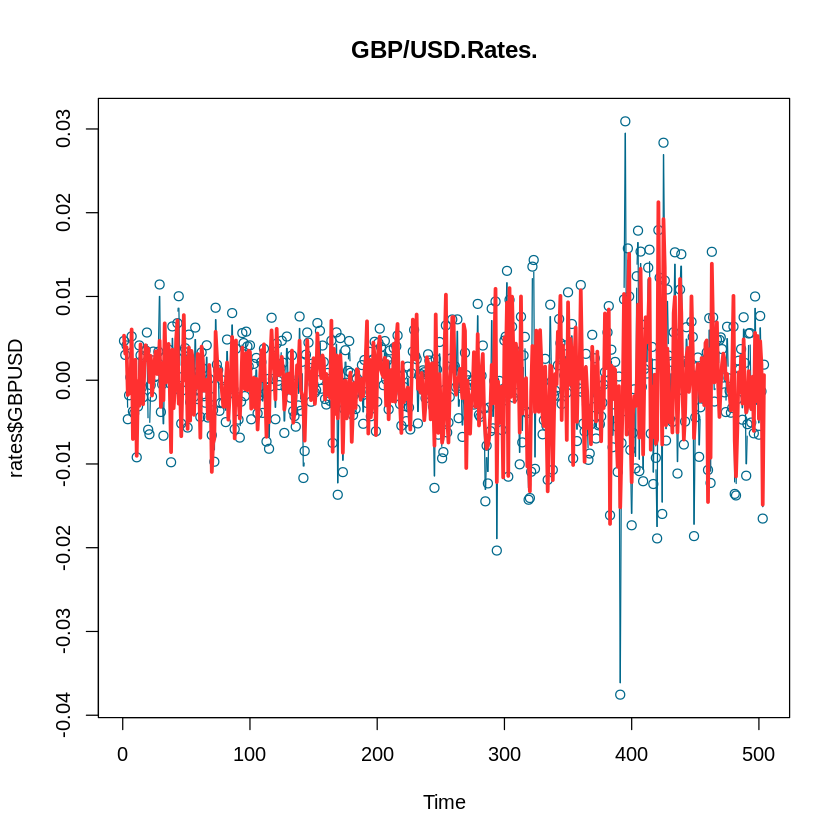

In [52]:
plot(rates$GBPUSD,type = "b",col='deepskyblue4',xlab='Time',main='GBP/USD.Rates.')
lines(regrRates1$fitted.values,col='firebrick1',lwd=3)

# Остатки

Остатки после удаления регрессии

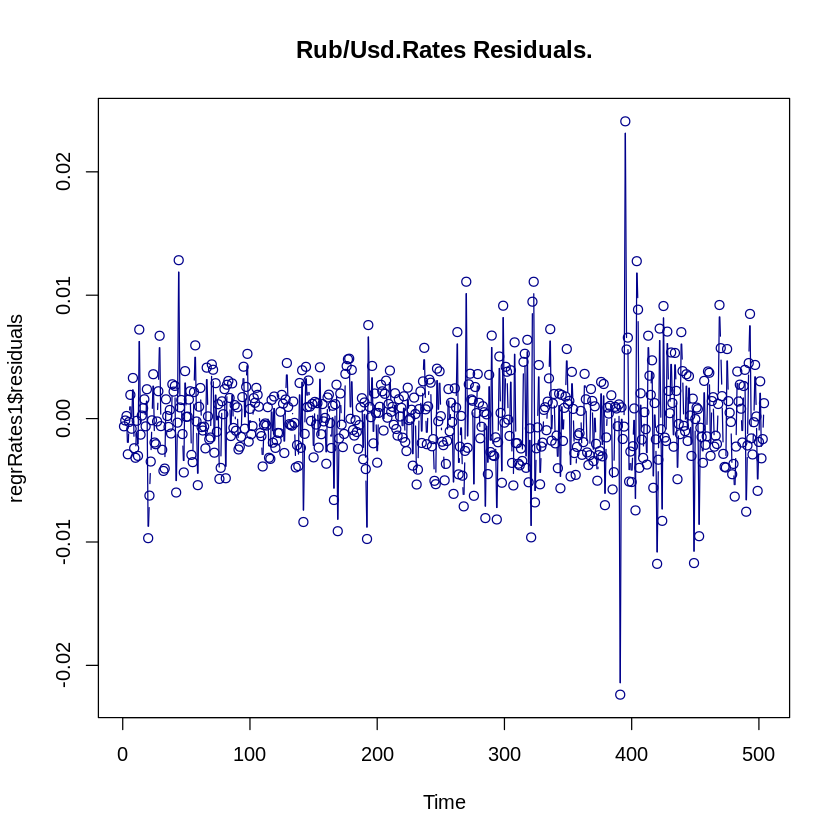

In [53]:
plot(regrRates1$residuals ,type = "b",col='blue4',xlab='Time',main='Rub/Usd.Rates Residuals.')

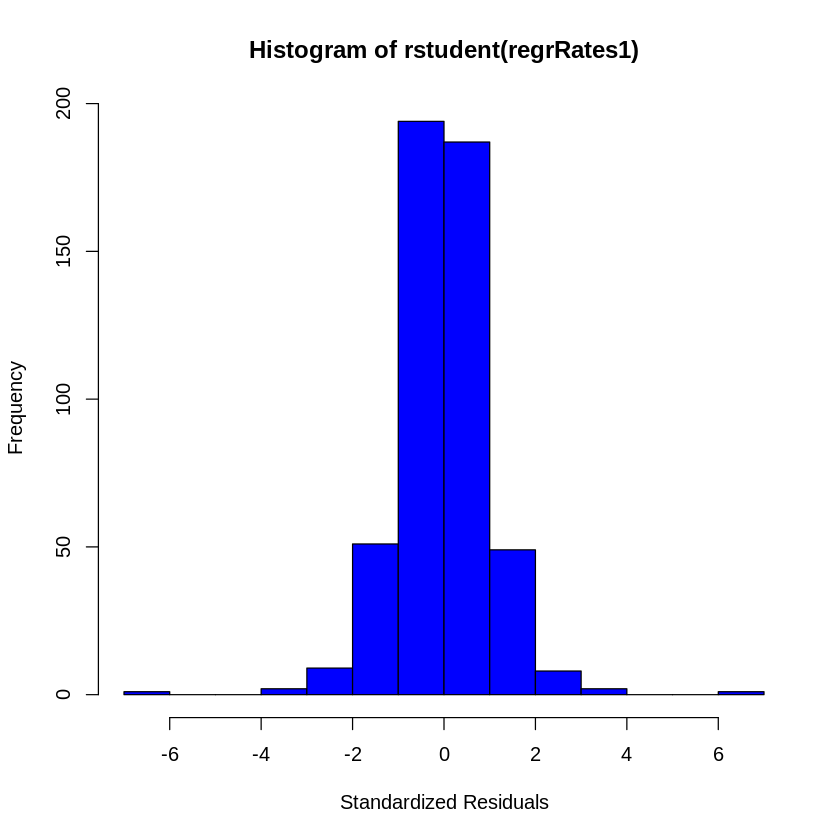

In [54]:
hist(rstudent(regrRates1),xlab='Standardized Residuals', col = "blue")

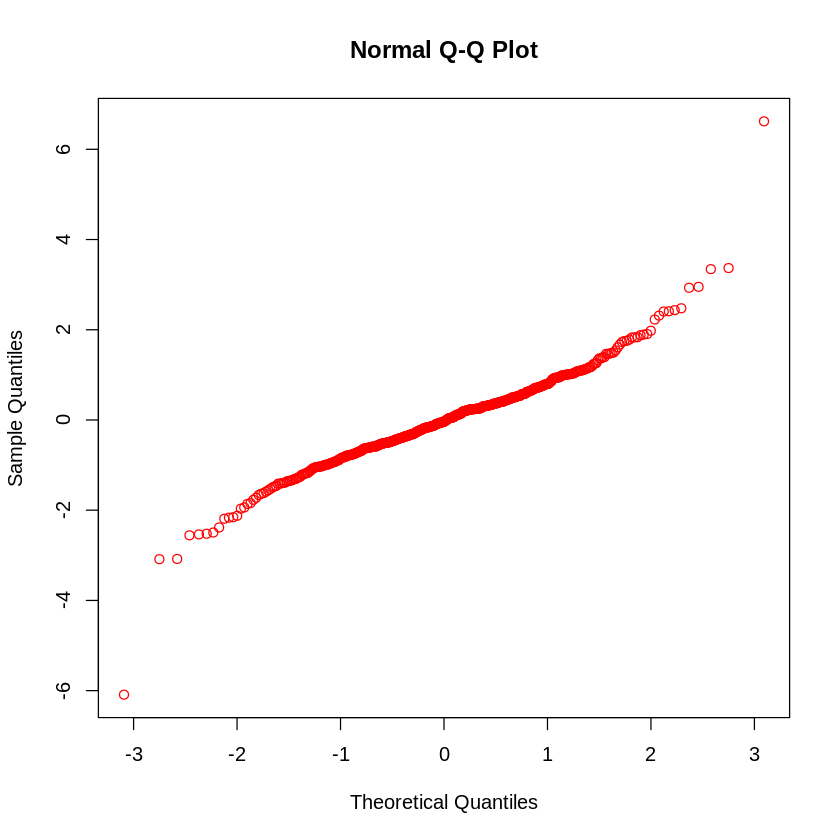

In [55]:
qqnorm(rstudent(regrRates1),col="red")

In [56]:
install.packages("fGarch")
library(fGarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘fBasics’, ‘timeDate’, ‘timeSeries’, ‘fastICA’, ‘cvar’


NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



In [57]:
shapiro.test((rstudent(regrRates1)))


	Shapiro-Wilk normality test

data:  (rstudent(regrRates1))
W = 0.94443, p-value = 8.406e-13


p-value < 0.05 - отвергаем гипотезу о нормальном распределении остатков

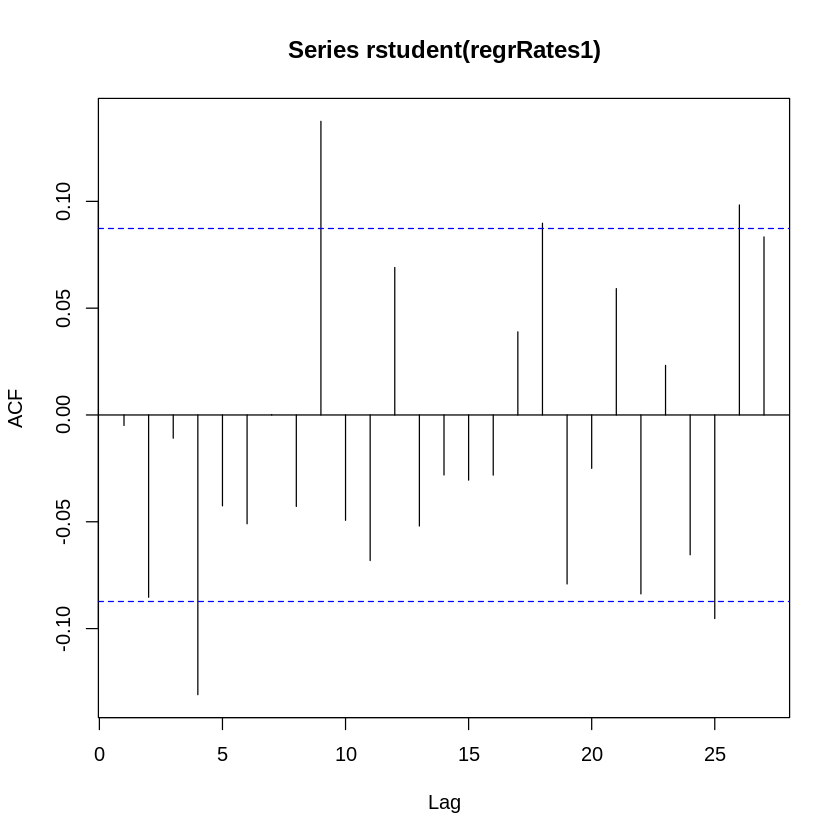

In [58]:
acf(rstudent(regrRates1))

ACF остатков выходит за полосу $±2/√n$, что отвергает гипотезу ρk=0 для всех k=±1,±2,... Таким образом не является белым шумом.

>Итого остатки распределены не нормально и коррелируют.
Попробуем теперь угадать распределение. Оно имеет хвосты на гистограмме и на Q-Qplot немного изгибается - похоже на логистическую.
Разобьем на тренировочную и тестовую выборки, а потом применим критерий Колмогорова-Смирнова

In [59]:
install.packages('caTools')
library(caTools)
set.seed(2)
sample <- sample.split(rstudent(regrRates1), SplitRatio=0.5)
train <- subset(rstudent(regrRates1), sample==TRUE)
test <- subset(rstudent(regrRates1), sample==FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [60]:
install.packages('MASS')
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
fitting_logistic <- fitdistr(train, "logistic")
library(ggplot2)
ks.test(test,'plogis', fitting_logistic$estimate[1], fitting_logistic$estimate[2])

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  test
D = 0.064543, p-value = 0.2446
alternative hypothesis: two-sided


Гипотезу о нормальности отвергают и некоторые другие тесты

In [74]:
ex <- function(xs){
    print(shapiro.test(xs))
    install.packages('nortest') 
    library(nortest) 
    print(ad.test(xs))
    print(cvm.test(xs)) 
    print(lillie.test(xs))
    print(sf.test(xs))
}

In [75]:
ex(rstudent(regrRates1))


	Shapiro-Wilk normality test

data:  xs
W = 0.94443, p-value = 8.406e-13



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Anderson-Darling normality test

data:  xs
A = 3.4337, p-value = 1.353e-08


	Cramer-von Mises normality test

data:  xs
W = 0.52061, p-value = 1.763e-06


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  xs
D = 0.06143, p-value = 0.0001054


	Shapiro-Francia normality test

data:  xs
W = 0.93878, p-value = 4.89e-12

